In [99]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [100]:
print(os.listdir('/content/IDS'))

['training_attack_types.txt', 'kddcup.data_10_percent.gz', 'kddcup.names', 'typo-correction.txt']


In [101]:
with open("/content/IDS/kddcup.names",'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [102]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
#print(columns)
print(len(columns))

42


In [103]:
with open("/content/IDS/training_attack_types.txt",'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [104]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

# **Reading Data**

In [105]:
path = "/content/IDS/kddcup.data_10_percent.gz"
df = pd.read_csv(path,names=columns)

#Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])



In [106]:
df.shape

(494021, 43)

In [107]:
df['target'].value_counts()

,count
target,
smurf.,280790
neptune.,107201
normal.,97278
back.,2203
satan.,1589
ipsweep.,1247
portsweep.,1040
warezclient.,1020
teardrop.,979


In [108]:
df['Attack Type'].value_counts()

,count
Attack Type,
dos,391458
normal,97278
probe,4107
r2l,1126
u2r,52


In [109]:
df.dtypes

,0
duration,int64
protocol_type,object
service,object
flag,object
src_bytes,int64
dst_bytes,int64
land,int64
wrong_fragment,int64
urgent,int64
hot,int64


# **Data Preprocessing**

In [110]:
df.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [111]:
#Finding categorical features
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['service', 'protocol_type', 'flag']

# **CATEGORICAL FEATURES DISTRIBUTION**

In [112]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

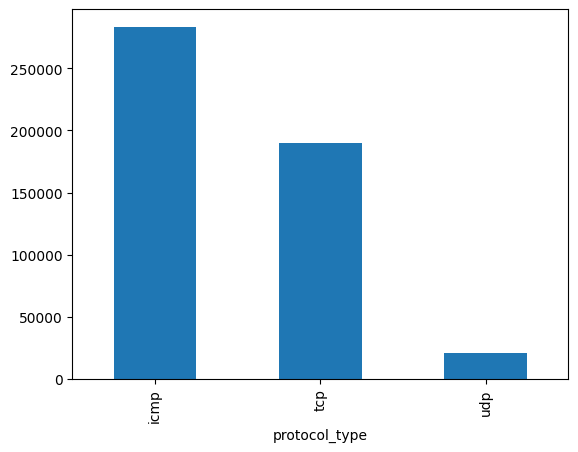

In [113]:
bar_graph('protocol_type')

Protocol type: We notice that ICMP is the most present in the used data, then TCP and almost 20000 packets of UDP type

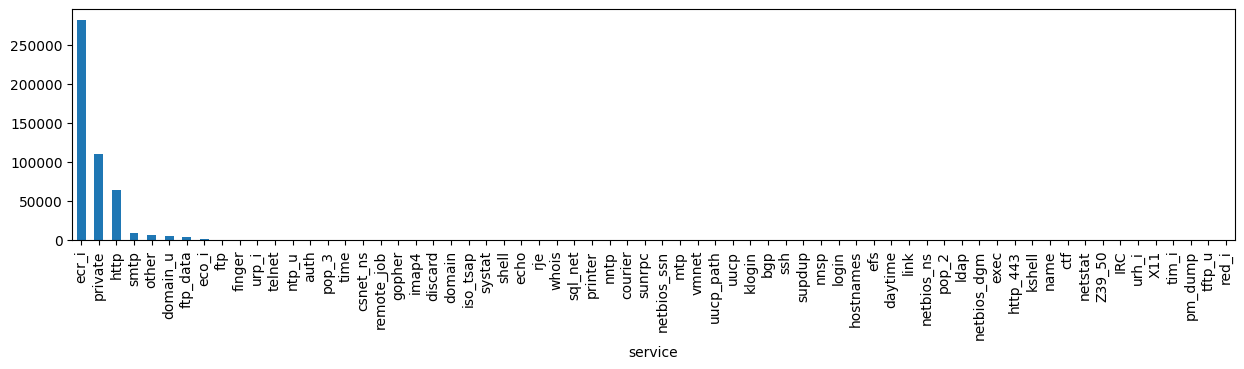

In [114]:
plt.figure(figsize=(15,3))
bar_graph('service')

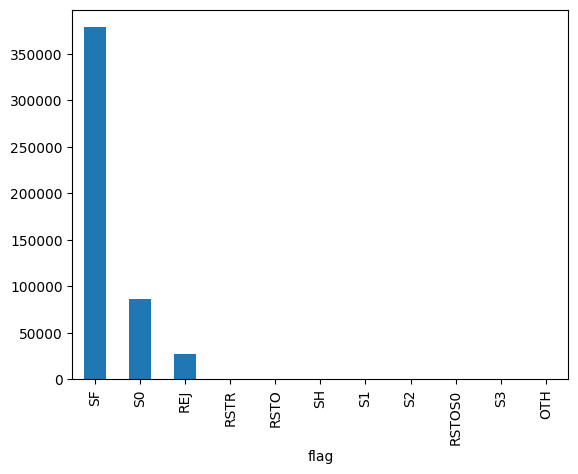

In [115]:
bar_graph('flag')

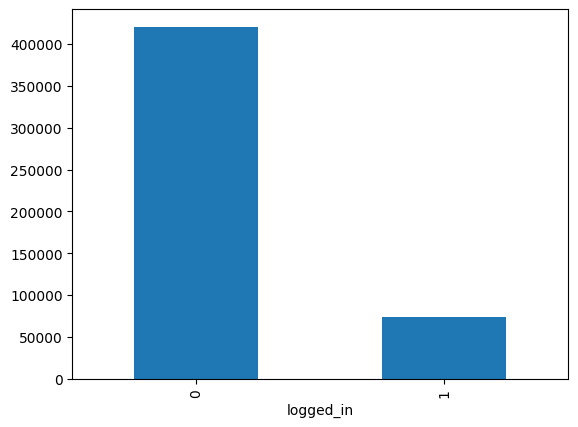

In [116]:
bar_graph('logged_in')

logged_in (1 if successfully logged in; 0 otherwise): We notice that just 70000 packets are successfully logged in.

# **TARGET FEATURE DISTRIBUTION**

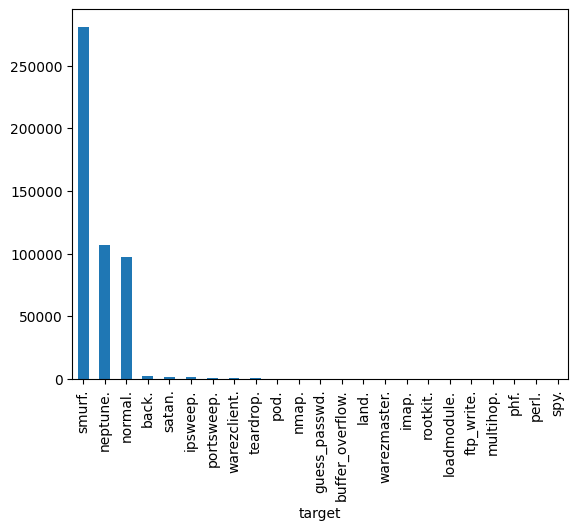

In [117]:
bar_graph('target')

Attack Type(The attack types grouped by attack, it's what we will predict)

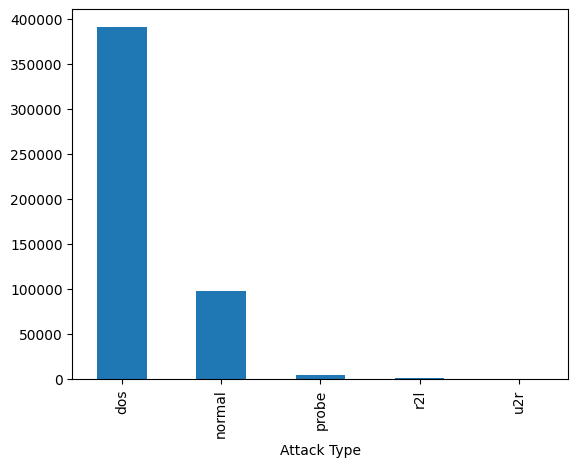

In [118]:
bar_graph('Attack Type')

In [119]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

# **DATA CORRELATION**

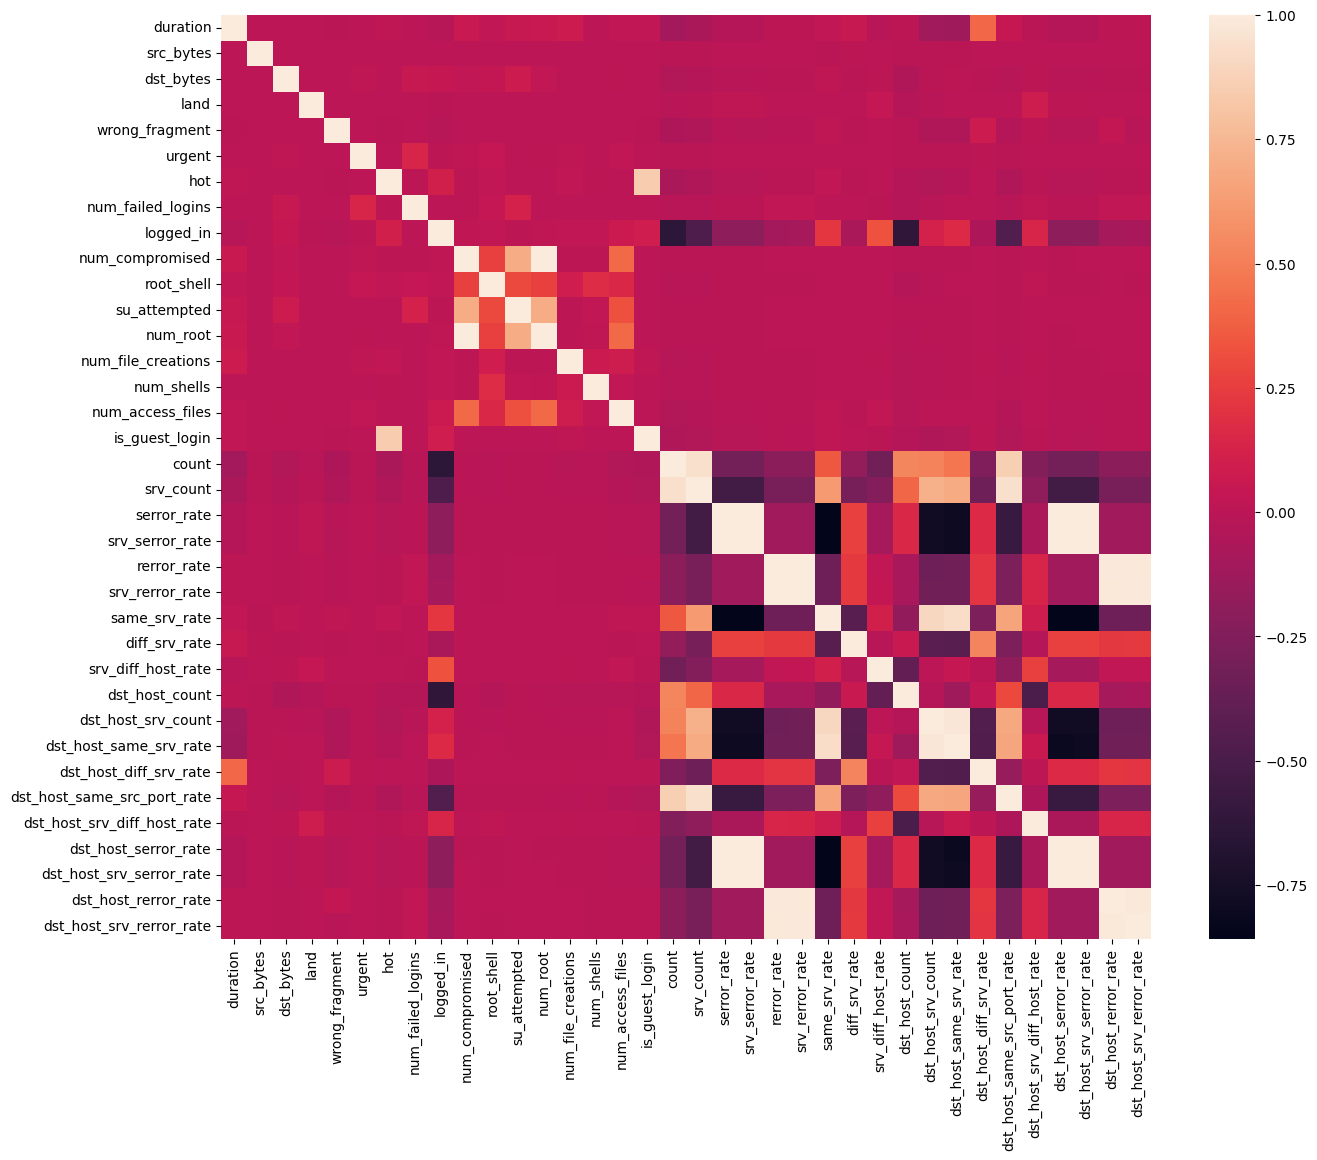

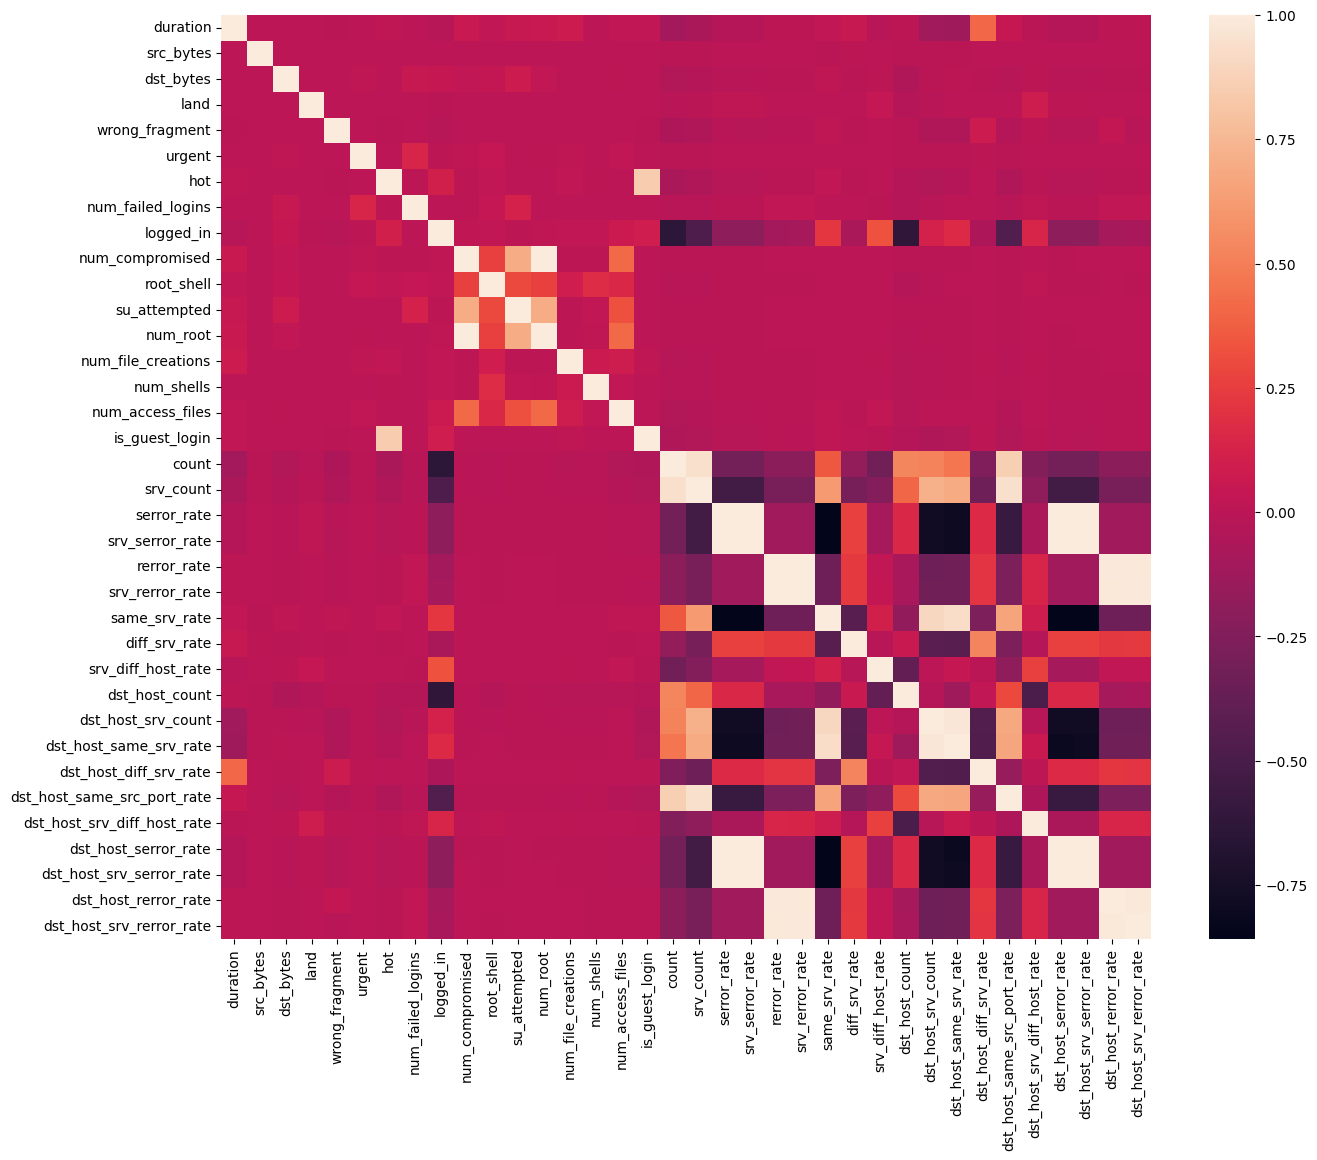

In [120]:
df = df.dropna(axis='columns')# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

#corr = df.corr()

# Select only numerical features for correlation analysis
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
corr = numerical_df.corr()

# Plotting the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corr)
plt.show()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [121]:
df['num_root'].corr(df['num_compromised'])

0.9938277978737916

In [122]:
df['srv_serror_rate'].corr(df['serror_rate'])

0.998361507272553

In [123]:
df['srv_count'].corr(df['count'])

0.9436670688882645

In [124]:
df['srv_rerror_rate'].corr(df['rerror_rate'])

0.9947309539818242

In [125]:
df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count'])

0.9736854572953835

In [126]:
df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate'])

0.9981559173373293

In [127]:
df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate'])

0.9848038371110285

In [128]:
df['dst_host_same_srv_rate'].corr(df['same_srv_rate'])

0.9278080342690969

In [129]:
df['dst_host_srv_count'].corr(df['same_srv_rate'])

0.8989546630323716

In [130]:
df['dst_host_same_src_port_rate'].corr(df['srv_count'])

0.944926367678324

In [131]:
df['dst_host_serror_rate'].corr(df['serror_rate'])

0.9986729680104371

In [132]:
df['dst_host_serror_rate'].corr(df['srv_serror_rate'])

0.9978353003739603

In [133]:
df['dst_host_srv_serror_rate'].corr(df['serror_rate'])

0.997849248567986

In [134]:
df['dst_host_srv_serror_rate'].corr(df['srv_serror_rate'])

0.999304109185027

In [135]:
df['dst_host_rerror_rate'].corr(df['rerror_rate'])

0.986994792495618

In [136]:
df['dst_host_rerror_rate'].corr(df['srv_rerror_rate'])

0.9821663427308264

In [137]:
df['dst_host_srv_rerror_rate'].corr(df['rerror_rate'])

0.9851995540751695

In [138]:
df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate'])

0.9865705438845764

In [139]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with dst_host_srv_count and should be ignored for analysis.
#(Correlation = 0.9865705438845669)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [140]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [141]:
df.shape

(494021, 33)

In [142]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'target',
       'Attack Type'],
      dtype='object')

In [143]:
#df_std = df.std()
#df_std = df_std.sort_values(ascending = True)
#df_std
# Select only numerical features for standard deviation calculation
numerical_df = df.select_dtypes(include=np.number)

# Calculate the standard deviation for numerical features only
df_std = numerical_df.std()

# Sort the standard deviations in ascending order
df_std = df_std.sort_values(ascending=True)

# Print the standard deviations
print(df_std)


urgent                              0.005510
land                                0.006673
su_attempted                        0.007793
root_shell                          0.010551
num_shells                          0.011020
num_failed_logins                   0.015520
num_access_files                    0.036482
is_guest_login                      0.037211
dst_host_srv_diff_host_rate         0.042133
diff_srv_rate                       0.082205
num_file_creations                  0.096416
dst_host_diff_srv_rate              0.109259
wrong_fragment                      0.134805
srv_diff_host_rate                  0.142397
rerror_rate                         0.231623
logged_in                           0.355345
serror_rate                         0.380717
same_srv_rate                       0.388189
dst_host_same_src_port_rate         0.481309
hot                                 0.782103
num_compromised                     1.798326
dst_host_count                     64.745380
dst_host_s

In [144]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [145]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,tcp,http,0,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,tcp,http,0,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,tcp,http,0,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,tcp,http,0,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,tcp,http,0,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [146]:
df.drop('service',axis = 1,inplace= True)

In [147]:
df.shape

(494021, 32)

In [148]:
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,tcp,0,181,5450,0,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,tcp,0,239,486,0,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,tcp,0,235,1337,0,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,tcp,0,219,1337,0,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,tcp,0,217,2032,0,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [149]:
df.dtypes

,0
duration,int64
protocol_type,object
flag,int64
src_bytes,int64
dst_bytes,int64
land,int64
wrong_fragment,int64
urgent,int64
hot,int64
num_failed_logins,int64


# **Modelling**

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [151]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder

# Check if 'target' column exists before dropping
if 'target' in df.columns:
    df = df.drop(['target',], axis=1)
else:
    print("Column 'target' not found in DataFrame.")

print(df.shape)

# Target variable and train set
Y = df[['Attack Type']]
X = df.drop(['Attack Type',], axis=1)

# Create a LabelEncoder object
le = LabelEncoder()

# Assuming 'protocol_type' is the categorical column containing 'tcp'
X['protocol_type'] = le.fit_transform(X['protocol_type'])

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(494021, 31)
(330994, 30) (163027, 30)
(330994, 1) (163027, 1)



# **GAUSSIAN NAIVE BAYES**

In [152]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [153]:
model1 = GaussianNB()

In [154]:
start_time = time.time()
model1.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [155]:
print("Training time: ",end_time-start_time)

Training time:  0.4119293689727783


In [156]:
start_time = time.time()
Y_test_pred1 = model1.predict(X_test)
end_time = time.time()

In [157]:
print("Testing time: ",end_time-start_time)

Testing time:  0.11983299255371094


In [158]:
print("Train score is:", model1.score(X_train, Y_train))
print("Test score is:",model1.score(X_test,Y_test))

Train score is: 0.8795114110829804
Test score is: 0.8790384414851528


# **Decision Tree**

In [159]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier


In [160]:
model2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [161]:
start_time = time.time()
model2.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [162]:
print("Training time: ",end_time-start_time)

Training time:  0.9420192241668701


In [163]:
start_time = time.time()
Y_test_pred2 = model2.predict(X_test)
end_time = time.time()

In [164]:
start_time = time.time()
Y_test_pred2 = model2.predict(X_test)
end_time = time.time()

In [165]:
print("Testing time: ",end_time-start_time)

Testing time:  0.010735034942626953


In [166]:
print("Train score is:", model2.score(X_train, Y_train))
print("Test score is:",model2.score(X_test,Y_test))

Train score is: 0.9939424883834752
Test score is: 0.9938476448686414


# **RANDOM FOREST**

In [167]:
from sklearn.ensemble import RandomForestClassifier

In [168]:
model3 = RandomForestClassifier(n_estimators=30)

In [169]:
start_time = time.time()
model3.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [170]:
print("Training time: ",end_time-start_time)

Training time:  7.129809617996216


In [171]:
start_time = time.time()
Y_test_pred3 = model3.predict(X_test)
end_time = time.time()

In [172]:
print("Testing time: ",end_time-start_time)

Testing time:  0.1709613800048828


In [173]:
print("Train score is:", model3.score(X_train, Y_train))
print("Test score is:",model3.score(X_test,Y_test))

Train score is: 0.9999909363915962
Test score is: 0.9997301060560521


# **SUPPORT VECTOR MACHINE**

In [174]:
from sklearn.svm import SVC

In [175]:

model4 = SVC(gamma = 'scale')

In [176]:
start_time = time.time()
model4.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [177]:
print("Training time: ",end_time-start_time)

Training time:  107.75217747688293


In [178]:
start_time = time.time()
Y_test_pred4 = model4.predict(X_test)
end_time = time.time()

In [179]:
print("Testing time: ",end_time-start_time)

Testing time:  41.53838872909546


In [180]:
print("Train score is:", model4.score(X_train, Y_train))
print("Test score is:", model4.score(X_test,Y_test))

Train score is: 0.9987552644458811
Test score is: 0.9987916112055059


# **LOGISTIC REGRESSION**

In [181]:
#from sklearn.linear_model import LogisticRegression

In [182]:
#model5 = LogisticRegression(max_iter=1200000)

In [183]:
# start_time = time.time()
# model5.fit(X_train, Y_train.values.ravel())
# end_time = time.time()

In [184]:
#print("Training time: ",end_time-start_time)

In [185]:
# start_time = time.time()
# Y_test_pred5 = model5.predict(X_test)
# end_time = time.time()

In [186]:
#print("Testing time: ",end_time-start_time)

In [187]:
# print("Train score is:", model5.score(X_train, Y_train))
# print("Test score is:",model5.score(X_test,Y_test))

# **GRADIENT BOOSTING CLASSIFIER**

In [188]:
from sklearn.ensemble import GradientBoostingClassifier

In [189]:
model6 = GradientBoostingClassifier(random_state=0)

In [190]:
start_time = time.time()
model6.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [191]:
print("Training time: ",end_time-start_time)

Training time:  256.7124638557434


In [192]:
start_time = time.time()
Y_test_pred6 = model6.predict(X_test)
end_time = time.time()

In [193]:
print("Testing time: ",end_time-start_time)

Testing time:  0.6041276454925537


In [194]:
print("Train score is:", model6.score(X_train, Y_train))
print("Test score is:", model6.score(X_test,Y_test))

Train score is: 0.9991389572016411
Test score is: 0.9990553711961823


In [195]:
import pickle

# Assuming 'model' is your trained IDS model
with open("model.pkl", "wb") as file:
    pickle.dump(model3, file)

print("Model saved successfully!")

Model saved successfully!


# **Artificial Neural Network**

In [196]:
!pip install scikeras

In [197]:
from keras.models import Sequential
from keras.layers import Dense
# Instead of keras.wrappers.scikit_learn, use scikeras.wrappers
from scikeras.wrappers import KerasClassifier

In [198]:
def fun():
    model = Sequential()

    #here 30 is output dimension
    model.add(Dense(30,input_dim =30,activation = 'relu',kernel_initializer='random_uniform'))

    #in next layer we do not specify the input_dim as the model is sequential so output of previous layer is input to next layer
    model.add(Dense(1,activation='sigmoid',kernel_initializer='random_uniform'))

    #5 classes-normal,dos,probe,r2l,u2r
    model.add(Dense(5,activation='softmax'))

    #loss is categorical_crossentropy which specifies that we have multiple classes

    model.compile(loss ='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

    return model

In [199]:
#Since,the dataset is very big and we cannot fit complete data at once so we use batch size.
#This divides our data into batches each of size equal to batch_size.
#Now only this number of samples will be loaded into memory and processed.
#Once we are done with one batch it is flushed from memory and the next batch will be processed.
model7 = KerasClassifier(build_fn=fun,epochs=100,batch_size=64)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelBinarizer

# ... (your existing code) ...

# Before fitting the model, one-hot encode Y_train
lb = LabelBinarizer()
Y_train_encoded = lb.fit_transform(Y_train)

# Now fit the model with the encoded target
start = time.time()
model7.fit(X_train, Y_train_encoded)  # Use Y_train_encoded instead of Y_train.values.ravel()
end = time.time()

# ... (rest of your code) ...

/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
5172/5172 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9181 - loss: 0.7569
Epoch 2/100
5172/5172 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9847 - loss: 0.0970
Epoch 3/100
5172/5172 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9844 - loss: 0.0731
Epoch 4/100
5172/5172 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9848 - loss: 0.0668
Epoch 5/100
5172/5172 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9848 - loss: 0.0651
Epoch 6/100
5172/5172 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.9849 - loss: 0.0631
Epoch 7/100
5172/5172 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9845 - loss: 0.0639
Epoch 8/100
5172/5172 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9846 - loss: 0.0616
Epoch 9/100
5172/5172 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9870 - loss: 0.0435
Epoch 10/100
5172/5172 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9893 - loss: 0.0301
Epoch 11/100
5172/5172 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9923 - loss: 0.0249
Epoch 12/100


In [202]:
import numpy as np

# Define a function to take user input
def predict_intrusion():
    # List of features required for prediction
    feature_names = [
        'duration', 'protocol_type', 'flag', 'src_bytes', 'dst_bytes', 'land',
        'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
        'num_compromised', 'root_shell', 'su_attempted', 'num_file_creations',
        'num_shells', 'num_access_files',
        'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate',
        'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
        'dst_host_srv_count', 'dst_host_diff_srv_rate',
        'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate'
    ]

    # Prompt the user for input for each feature
    print("Please provide the following features for prediction:")
    feature_values = []
    for feature in feature_names:
        value = float(input(f"Enter value for {feature}: "))
        feature_values.append(value)

    # Convert the input features into a NumPy array
    user_input = np.array([feature_values])

    # Scale the input using the same scaler used during training
    user_input_scaled = sc.transform(user_input)

    # Predict the attack type using the trained model
    attack_type_prediction = model4.predict(user_input_scaled)

    # Display the prediction result
    print("\nPrediction:")
    print(f"The network activity is classified as: {attack_type_prediction[0]}")

# Call the function to run the prediction
predict_intrusion()


Please provide the following features for prediction:
Enter value for duration: 0
Enter value for protocol_type: 1
Enter value for flag: 0
Enter value for src_bytes: 181
Enter value for dst_bytes: 5450
Enter value for land: 0
Enter value for wrong_fragment: 0
Enter value for urgent: 0
Enter value for hot: 0
Enter value for num_failed_logins: 0
Enter value for logged_in: 1
Enter value for num_compromised: 0
Enter value for root_shell: 0
Enter value for su_attempted: 0
Enter value for num_file_creations: 0
Enter value for num_shells: 0
Enter value for num_access_files: 0
Enter value for is_guest_login: 0
Enter value for count: 8
Enter value for srv_count: 8
Enter value for serror_rate: 0
Enter value for rerror_rate: 0
Enter value for same_srv_rate: 1
Enter value for diff_srv_rate: 0
Enter value for srv_diff_host_rate: 0
Enter value for dst_host_count: 9
Enter value for dst_host_srv_count: 9
Enter value for dst_host_diff_srv_rate: 0
Enter value for dst_host_same_src_port_rate: 0.11
Enter 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
